In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('..\dataset\healthcare-dataset-stroke-data.csv')

In [3]:
df = df.dropna()

C:\Users\User\AppData\Local\Temp\ipykernel_17492\1120506178.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set(


[Text(0.5, 1.0, 'Correlation between the data')]

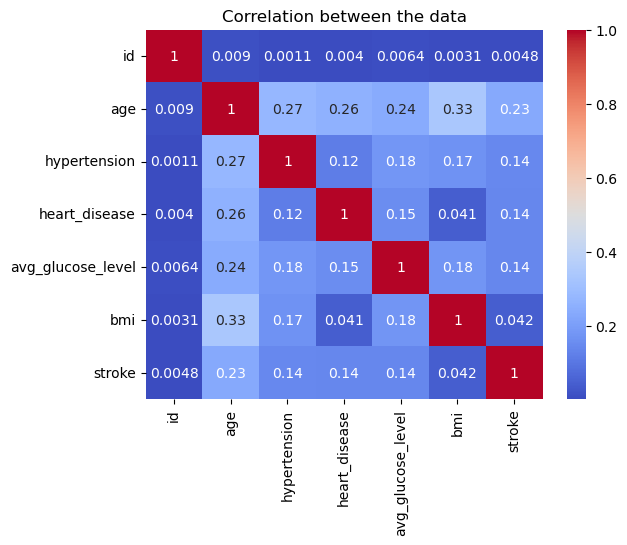

In [4]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm').set(
    title = "Correlation between the data")

In [5]:
df = df[df['gender'] != 'Other']

In [6]:
df.gender.unique()

array(['Male', 'Female'], dtype=object)

In [7]:
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df.loc[df['ever_married'] == 'Yes', 'married'] = 1
df.loc[df['ever_married'] == 'No', 'married'] = 0
df.ever_married.unique()

array(['Yes', 'No'], dtype=object)

In [9]:
df = df.drop(['id', 'ever_married'], axis = 1)
df

,gender,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,married
0,Male,67.0,0,1,Private,Urban,228.69,36.6,formerly smoked,1,1.0
2,Male,80.0,0,1,Private,Rural,105.92,32.5,never smoked,1,1.0
3,Female,49.0,0,0,Private,Urban,171.23,34.4,smokes,1,1.0
4,Female,79.0,1,0,Self-employed,Rural,174.12,24.0,never smoked,1,1.0
5,Male,81.0,0,0,Private,Urban,186.21,29.0,formerly smoked,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13.0,0,0,children,Rural,103.08,18.6,Unknown,0,0.0
5106,Female,81.0,0,0,Self-employed,Urban,125.20,40.0,never smoked,0,1.0
5107,Female,35.0,0,0,Self-employed,Rural,82.99,30.6,never smoked,0,1.0
5108,Male,51.0,0,0,Private,Rural,166.29,25.6,formerly smoked,0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4908 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4908 non-null   object 
 1   age                4908 non-null   float64
 2   hypertension       4908 non-null   int64  
 3   heart_disease      4908 non-null   int64  
 4   work_type          4908 non-null   object 
 5   Residence_type     4908 non-null   object 
 6   avg_glucose_level  4908 non-null   float64
 7   bmi                4908 non-null   float64
 8   smoking_status     4908 non-null   object 
 9   stroke             4908 non-null   int64  
 10  married            4908 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 460.1+ KB


In [11]:
df_dummy = pd.get_dummies(df)
df_dummy

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,married,gender_Female,gender_Male,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1.0,0,1,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,105.92,32.5,1,1.0,0,1,0,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1.0,1,0,0,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1.0,1,0,0,0,0,1,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1.0,0,1,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0,0.0,1,0,0,0,0,0,1,1,0,1,0,0,0
5106,81.0,0,0,125.20,40.0,0,1.0,1,0,0,0,0,1,0,0,1,0,0,1,0
5107,35.0,0,0,82.99,30.6,0,1.0,1,0,0,0,0,1,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,25.6,0,1.0,0,1,0,0,1,0,0,1,0,0,1,0,0


In [12]:
x_data = df_dummy.drop('stroke', axis = 1)
y_data = df_dummy.stroke

from sklearn.model_selection import train_test_split

# 자르기
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, random_state = 333, test_size = 0.3, stratify = y_data)

In [108]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
model = lgb.LGBMClassifier()

param = {'boosting_type' : ['dart'],
         'max_depth' : [10, 20, 30, 40, 50],
    'num_leaves':[5, 6, 7, 8, 9, 10],
         "objective" : ['binary'], 
         'class_weight' : ['balanced']}
grid = GridSearchCV(model, param_grid = param, cv=3, refit = True ,  scoring='recall')
grid.fit(x_train, y_train)
pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 98, number of negative: 2192
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000088 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 635
[LightGBM] [Info] Number of data points in the train set: 2290, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 97, number of negative: 2193
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wis

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.712727,1,0.770833,0.795918,0.571429
1,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.678571,6,0.750000,0.734694,0.551020
2,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.658022,16,0.729167,0.714286,0.530612
3,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.664683,11,0.708333,0.755102,0.530612
4,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.630527,21,0.687500,0.714286,0.489796
5,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.610119,26,0.687500,0.673469,0.469388
6,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.712727,1,0.770833,0.795918,0.571429
7,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.678571,6,0.750000,0.734694,0.551020
8,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.658022,16,0.729167,0.714286,0.530612
9,"{'boosting_type': 'dart', 'class_weight': 'bal...",0.664683,11,0.708333,0.755102,0.530612


In [110]:
grid.best_estimator_

LGBMClassifier(boosting_type='dart', class_weight='balanced', max_depth=10,
               num_leaves=5, objective='binary')

In [112]:
from sklearn.metrics import classification_report
m_lgb = lgb.LGBMClassifier(boosting_type='dart', class_weight='balanced', max_depth=10, num_leaves=5, objective='binary')
m_lgb.fit(x_train, y_train)
print(classification_report(y_train, m_lgb.predict(x_train)))
print(classification_report(y_test, m_lgb.predict(x_test)))

#               precision    recall  f1-score   support

#            0       0.99      0.75      0.86      3289
#            1       0.14      0.88      0.24       146

#     accuracy                           0.76      3435
#    macro avg       0.57      0.82      0.55      3435
# weighted avg       0.96      0.76      0.83      3435

#               precision    recall  f1-score   support

#            0       0.99      0.73      0.84      1410
#            1       0.11      0.78      0.20        63

#     accuracy                           0.73      1473
#    macro avg       0.55      0.75      0.52      1473
# weighted avg       0.95      0.73      0.81      1473

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 146, number of negative: 3289
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 639
[LightGBM] [Info] Number of data points in the train set: 3435, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
              precision    recall  f1-score   support

           0       0.99      0.75      0.86      3289
           1       0.14      0.88      0.24       146

    accuracy                           0.76      3435
   macro avg       0.57      0.82      0.55      3435
weighted avg       0.96      0.76      0.83      3435

              precision    recall  f1-score   support

           0       0.99      0.73      0.84   

In [109]:
for p in (pd.DataFrame(grid.cv_results_)['params']):
    print(p)

{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 5, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 6, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 7, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 8, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 9, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 10, 'num_leaves': 10, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 20, 'num_leaves': 5, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 20, 'num_leaves': 6, 'objective': 'binary'}
{'boosting_type': 'dart', 'class_weight': 'balanced', 'max_depth': 20, 'num_leaves': 7, 'objective': 'binary'}


----

In [116]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC()

param = {'C' : [0.001, 0.01, 0.1, 1, 10, 100],
         'kernel' : ['linear', 'ploy', 'rbf', 'sigmoid'], 
         'class_weight' : ['balanced']}
grid = GridSearchCV(model, param_grid = param, cv=3, refit = True ,  scoring='recall')
grid.fit(x_train, y_train)
pd.DataFrame(grid.cv_results_)[['params', 'mean_test_score', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score']]

c:\Users\User\anaconda3\envs\my_python_env2\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
18 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\anaconda3\envs\my_python_env2\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\anaconda3\envs\my_python_env2\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "c:\Users\User\anaconda3\envs\my_python_env2\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validat

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'class_weight': 'balanced', 'kern...",0.802012,6,0.895833,0.836735,0.673469
1,"{'C': 0.001, 'class_weight': 'balanced', 'kern...",NaN,19,NaN,NaN,NaN
2,"{'C': 0.001, 'class_weight': 'balanced', 'kern...",0.666667,12,0.000000,1.000000,1.000000
3,"{'C': 0.001, 'class_weight': 'balanced', 'kern...",0.666667,12,0.000000,1.000000,1.000000
4,"{'C': 0.01, 'class_weight': 'balanced', 'kerne...",0.808815,4,0.895833,0.836735,0.693878
5,"{'C': 0.01, 'class_weight': 'balanced', 'kerne...",NaN,19,NaN,NaN,NaN
6,"{'C': 0.01, 'class_weight': 'balanced', 'kerne...",0.624858,16,0.854167,0.367347,0.653061
7,"{'C': 0.01, 'class_weight': 'balanced', 'kerne...",0.409722,17,0.229167,0.530612,0.469388
8,"{'C': 0.1, 'class_weight': 'balanced', 'kernel...",0.801871,7,0.875000,0.836735,0.693878
9,"{'C': 0.1, 'class_weight': 'balanced', 'kernel...",NaN,19,NaN,NaN,NaN


In [118]:
for p in (pd.DataFrame(grid.cv_results_)['params']):
    print(p)

{'C': 0.001, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 0.001, 'class_weight': 'balanced', 'kernel': 'ploy'}
{'C': 0.001, 'class_weight': 'balanced', 'kernel': 'rbf'}
{'C': 0.001, 'class_weight': 'balanced', 'kernel': 'sigmoid'}
{'C': 0.01, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 0.01, 'class_weight': 'balanced', 'kernel': 'ploy'}
{'C': 0.01, 'class_weight': 'balanced', 'kernel': 'rbf'}
{'C': 0.01, 'class_weight': 'balanced', 'kernel': 'sigmoid'}
{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'ploy'}
{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'rbf'}
{'C': 0.1, 'class_weight': 'balanced', 'kernel': 'sigmoid'}
{'C': 1, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 1, 'class_weight': 'balanced', 'kernel': 'ploy'}
{'C': 1, 'class_weight': 'balanced', 'kernel': 'rbf'}
{'C': 1, 'class_weight': 'balanced', 'kernel': 'sigmoid'}
{'C': 10, 'class_weight': 'balanced', 'kernel': 'linear'}
{'C': 10, 

In [21]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.svm import SVC
m_svc = SVC(C= 0.1, class_weight= 'balanced', kernel= 'rbf')
m_svc.fit(x_train, y_train)
y_pred = m_svc.predict(x_test)
print(classification_report(y_train, m_svc.predict(x_train)))
print(classification_report(y_test, m_svc.predict(x_test)))
train_rcl = recall_score(y_test, y_pred, pos_label = 0)
train_rcl

#               precision    recall  f1-score   support

#            0       0.99      0.71      0.83      3289
#            1       0.11      0.81      0.20       146

#     accuracy                           0.72      3435
#    macro avg       0.55      0.76      0.51      3435
# weighted avg       0.95      0.72      0.80      3435

#               precision    recall  f1-score   support

#            0       0.99      0.69      0.81      1410
#            1       0.10      0.81      0.19        63

#     accuracy                           0.70      1473
#    macro avg       0.55      0.75      0.50      1473
# weighted avg       0.95      0.70      0.79      1473

              precision    recall  f1-score   support

           0       0.99      0.71      0.83      3289
           1       0.11      0.81      0.20       146

    accuracy                           0.72      3435
   macro avg       0.55      0.76      0.51      3435
weighted avg       0.95      0.72      0.80      3435

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      1410
           1       0.10      0.81      0.19        63

    accuracy                           0.70      1473
   macro avg       0.55      0.75      0.50      1473
weighted avg       0.95      0.70      0.79      1473



0.6900709219858157

str